# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
| | |
| | |
| | |
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [10]:
!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import  Graph

In [11]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')

<Graph identifier=N3c7662d34dc8416aa0ab1c9b75ee72ef (<class 'rdflib.graph.Graph'>)>

In [12]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/1978_Stinkers_Bad_Movie_Awards'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Hood_2_Hood:_The_Blockumentary'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

# Hoe werk je met RDFlib?

RDF is een manier van informatie weergeven op basis van relaties. Deze relaties worden opgeslagen als een 'triple', wat betekent dat elke relatie een 

Subject (het onderwerp)
Predicate (de relatieaanduiding)
Object (de knoop met wie de relatie wordt aangegaan)

heeft.

### In de onderstaande code is te zien hoe data in een dergelijke database wordt 'opgeschreven' en gevisualiseerd. 

De knopen worden als eerste gemaakt door middel van de functie BNode(), die staat voor blank node.
met de functie .add (in dit geval g.add omdat onze functie g heet!), kunnen triples worden toegevoegd. 

De triples zoals hier voor beschreven zijn manieren om alle data op te schrijven.

Zo staat bijvoorbeeld:

g.add((vader, FOAF.ouder_van, dochter))

er voor dat er een triple wordt aangemaakt. In dit geval betekent dat dat het subject 'vader' is, de relatie is 'ouder van' en het lijdend voorwerp is dochter.

Hier onder staat het iets groter uitgewerkt, met 4 nodes en een aantal gedefinieerde relaties.

In [ ]:
from rdflib import URIRef, BNode, Literal
from rdflib.namespace import FOAF , XSD, RDF


# hier worden nodes aangemaakt voor vader, moeder, zoon en dochter. Dit zijn BNodes omdat de URI niet gebruikt wordt of onbekend is. 

vader = BNode()  # a GUID is generated
moeder = BNode()
zoon = BNode()
dochter = BNode()


# hier worden edges toegevoegd (aan de hand van triples?), waarbij het type van de edge wordt bepaald/gespecificeerd (namelijk persoon) etc.


from rdflib import Graph
g = Graph()
g.bind("foaf", FOAF)

g.add((vader, RDF.type, FOAF.Person))
g.add((vader, FOAF.name, Literal("vader")))
g.add((vader, FOAF.ouder_van, zoon))
g.add((vader, FOAF.ouder_van, dochter))
g.add((moeder, RDF.type, FOAF.Person))
g.add((moeder, FOAF.name, Literal("moeder")))
g.add((moeder, FOAF.ouder_van, zoon))
g.add((moeder, FOAF.ouder_van, dochter))
g.add((zoon, RDF.type, FOAF.Person))
g.add((zoon, FOAF.name, Literal("zoon")))
g.add((dochter, RDF.type, FOAF.Person))
g.add((dochter, FOAF.name, Literal("dochter")))

print(g.serialize(format="turtle").decode("utf-8"))

##### In de onderstaande 2 blokken code staan 2 netwerken gedefinieerd. Aan de hand van kleine stappen gaan we deze omzetten naar RDF libraries. 
De eerste graph betreft een stamboom, waarin de egdes aangeven wie biologische ouder van wie is. De tweede graaf betreft een graph waarin de nodes seksuele voorkeuren zijn, en de relaties tussen twee nodes is of de 1 aangetrokken zou zijn tot de ander.



in de tutorial/code in de volgende blokken laten wij zien hoe je van een networkX graaf een RDF library kan maken.

De onderstaande graaf is een graaf van een familie. De relaties geven aan wie 'ouder van' wie is.

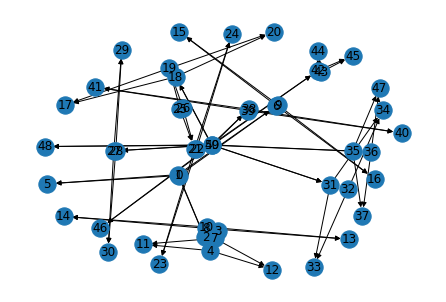

In [13]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# lege digraph
Families = nx.DiGraph()

# 1 familie
Families.add_edges_from([(0,4), (1,4), (0,5), (1,5), (0,6), (1,6)])
Families.add_edges_from([(2,7), (3,7), (2,8), (3,8)])
Families.add_edges_from([(4,11), (7,11), (4,12), (7,12), (8,13), (10,13), (8,14), (10,14), (6,15), (6,16), (9,15), (9,16)])

# 1 familie
Families.add_edges_from([(18,17), (19,17), (18,20), (19,20)])
Families.add_edges_from([(21,23), (21,24), (22,23), (22,24)])
Families.add_edges_from([(25,19), (26,19), (25,21), (26,21)])
Families.add_edges_from([(27,29), (27,30), (28,29), (28,30)])
Families.add_edges_from([(31,33), (31,34), (32,33), (32,34)])
Families.add_edges_from([(35,37), (36,37)])
Families.add_edges_from([(38,40), (38,41), (39,40), (39,41)])
Families.add_edges_from([(42,44), (43,44), (42,45), (43,45)])
Families.add_edges_from([(49,18), (50,18), (49, 27), (50, 27), (49, 31), (50, 31), (49, 36), (50, 36), (49, 38), 
                         (50, 38), (49, 42), (50, 42), (49, 46), (50, 46), (49, 48), (50, 48), (35, 47), (36, 47)])

# mannen en vrouwen gedefinieerd
M = {0,2,7,9,10,11,12,13,17,18,20,21,23,26,27,29,30,31,35,38,40,41,42,44,45,47,48,50} 
V = {1,3,4,5,6,8,14,15,16,19,22,24,25,28,32,33,34,36,37,39,43,46,49} 

# kloppend maken
for n in M:
    Families.nodes[n]['M']=True
    Families.nodes[n]['V']=False
for n in V:
    Families.nodes[n]['V']=True
    Families.nodes[n]['M']=False 

    
nx.draw(Families, with_labels = True)

# drawing the graph
# graph = graphviz_layout(Families, prog = 'dot')
# plt.figure(figsize = (150, 50))
# nx.draw(Families, with_labels = True, arrowsize = 100, node_size = 100000, font_size = 125, font_color = 'White', width = 15)

In [14]:
import networkx as nx
import rdflib
import matplotlib.pyplot as plt
from rdflib import URIRef, BNode, Literal

LHBTQI = nx.DiGraph()

LHBTQI.add_edges_from([('HM','HV'), ('HM','L'), ('HM','BV')])
LHBTQI.add_edges_from([('HV','HM'), ('HV','H'), ('HV','BM')])
LHBTQI.add_edges_from([('H','HM'), ('H','H'), ('H','BM')])
LHBTQI.add_edges_from([('L','HV'), ('L','L'), ('L','BV')])
LHBTQI.add_edges_from([('BM','HM'), ('BM','H'), ('BM','BM'), ('BM','HV'), ('BM','L'), ('BM','BV')])
LHBTQI.add_edges_from([('BV','HV'), ('BV','L'), ('BV','BV'), ('BV','HM'), ('BV','H'), ('BV','BM')])
LHBTQI.add_edges_from([('Q','HM'), ('Q','HV'), ('Q','H'), ('Q','L'), ('Q','BM'), ('Q','BV'), ('Q','Q'), ('Q','P')])

print('HM: Hetero (Straight) Man')
print('HV: Hetero (Straight) Vrouw')
print('H: Homoseksuele Man')
print('L: Lesbische Vrouw')
print('BM: Biseksuele Man')
print('BV: Biseksuele Vrouw')
print('Q: Queer')
print('P: Plus+')

HM: Hetero (Straight) Man
HV: Hetero (Straight) Vrouw
H: Homoseksuele Man
L: Lesbische Vrouw
BM: Biseksuele Man
BV: Biseksuele Vrouw
Q: Queer
P: Plus+


# Hoe maak je van een NetworkX bestand een RDFlib?

De onderstaande functie pakt een grafiek. In dit geval testen wij hem met één van de grafieken die wij hierboven hebben gedefinieerd. In de comments is te lezen wat welke stap doet.


In [15]:
def networkx2RDF(G):
    # maak een graph aan
    R = rdflib.Graph()

    # loop door de edge van gegeven graph
    for edge in G.edges:

        # Voeg een edge toe aan de rdf database, edges als subject en object, relatie als pedicaat
        R.add((BNode(edge[0]),BNode('Relatie'),BNode(edge[1])))
    return R
    
H = networkx2RDF(LHBTQI)

triples= [triple for triple in H]
triples, len(triples)



([(rdflib.term.BNode('BV'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('L')),
  (rdflib.term.BNode('L'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('L')),
  (rdflib.term.BNode('BM'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('H')),
  (rdflib.term.BNode('BV'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('HM')),
  (rdflib.term.BNode('Q'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('BV')),
  (rdflib.term.BNode('HV'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('BM')),
  (rdflib.term.BNode('HM'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('BV')),
  (rdflib.term.BNode('Q'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('BM')),
  (rdflib.term.BNode('BM'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('BV')),
  (rdflib.term.BNode('BV'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('HV')),
  (rdflib.term.BNode('BM'),
   rdflib.term.BNode('Relatie'),
   rdflib.term.BNode('BM')),
  (rdflib.term.B

# Meer oefenen met triples

Als laatste gaan we een triple store van het world wide web downloaden om deze vervolgens om te zetten tot het formaat van networkx. Via https://wiki.dbpedia.org/ kunnen we enorm veel verschillende pagina's downloaden tot triple vorm. Het downloaden van site tot triples kan met parse(). Bijvoorbeeld: we willen data over een van de allerbeste voetballer ter wereld. Dan maken we een variabele g aan die we vullen met de functie parse en vullen we bij parse de link naar de legende Klaas Jan Huntelaar in.

In [17]:
g = Graph()

g.parse('http://dbpedia.org/resource/Klaas-Jan_Huntelaar%27')
triples= [triple for triple in h]
triples[:2], len(triples)

NameError: name 'Graph' is not defined

Deze tripples bevatten ieder een feit over Klaas. Elk van deze feiten hebben weer een link naar de pagina waar de informatie vandaan komt. Nu we data hebben ingeladen is het tijd om het om te zetten tot een networkx graph. Met de functie networkx.conert.to_networkx_graph(x) is het mogelijk om een networkx graph te maken met x als een vorm van data. Deze functie kan verschillende vormen van data omzetten en heeft niet percee 1 vaste vorm nodig. Verder documentatie: https://networkx.org/documentation/stable//reference/generated/networkx.convert.to_networkx_graph.html#networkx.convert.to_networkx_graph

Om de triples verkregen van dbpedia in networkx vorm te krijgen gaan we eerst de subject en object van de triples omzetten in edges. Dit doen we als volgt met een list comprehension:

In [ ]:
list = [(triple[0],triple[2]) for triple in triples]
p = networkx.convert.to_networkx_graph(list)

Uiteindelijk kan het network met de functie worden gevormd.

In [18]:
nx.draw(p, with_label=True)

NameError: name 'p' is not defined